In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
eq_df = pd.read_csv(r'C:\Users\mishra\Downloads\eqdata.csv')
eq_df['CLASS'].value_counts()
eq_df.isnull().sum()

Date                            0
Time                            0
Latitude                        0
Longitude                       0
Type                            0
Depth                           0
Depth Error                   629
Depth Seismic Stations        523
Magnitude                       0
Magnitude Type                  0
CLASS                           0
Magnitude Error               738
Magnitude Seismic Stations    718
Azimuthal Gap                 509
Horizontal Distance           680
Horizontal Error              694
Root Mean Square              217
ID                              0
Source                          0
Location Source                 0
Magnitude Source                0
Status                          0
dtype: int64

<Axes: xlabel='Magnitude', ylabel='Latitude'>

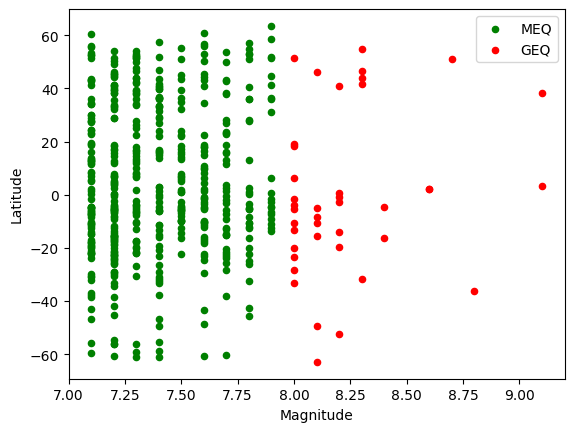

In [94]:
MEQ_df=eq_df[eq_df['Magnitude']<8][0:500]
GEQ_df=eq_df[eq_df['Magnitude']>=8][0:500]

axes=MEQ_df.plot(kind='scatter',y='Latitude', x='Magnitude',label='MEQ', color='green')
GEQ_df.plot(kind='scatter',y='Latitude', x='Magnitude',label='GEQ', color='red',ax=axes)

<Axes: xlabel='Depth', ylabel='Latitude'>

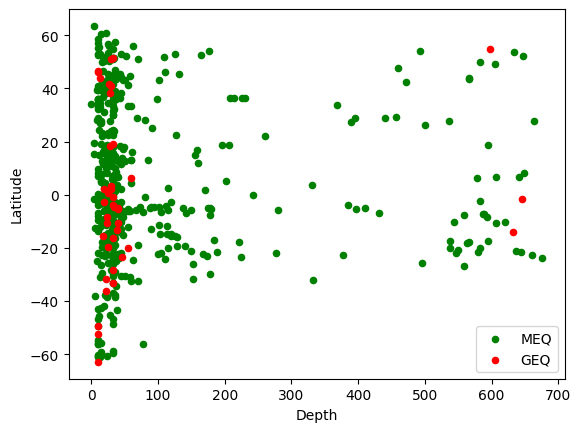

In [95]:
axes=MEQ_df.plot(kind='scatter',y='Latitude', x='Depth',label='MEQ', color='green')
GEQ_df.plot(kind='scatter',y='Latitude', x='Depth',label='GEQ', color='red',ax=axes)

In [103]:
eq_df.columns
feature_df=eq_df[[ 'Latitude', 'Longitude', 'Depth',]]
#independent variables
X=np.asarray(feature_df)

#dependent variable
Y=np.asarray(eq_df['Magnitude'])
X[0:5]




array([[  3.295,  95.982,  30.   ],
       [ 38.297, 142.373,  29.   ],
       [-36.122, -72.898,  22.9  ],
       [ 51.251, 178.715,  30.3  ],
       [  2.085,  97.108,  30.   ]])

In [100]:
eq_df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'CLASS',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [104]:
'''80:20 partition'''
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
#X_train= 590x5
#Y_train=590
#X_test.shape= 148x5
#Y_test.shape=148


In [105]:
from sklearn import svm
#gamma=co-efficient ,C=penalty
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,Y_train)
Y_predict = classifier.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [74]:
Y_predict

array(['MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'GEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'GEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'GEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'GEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ', 'MEQ',
       'MEQ', 'MEQ',

In [75]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

         GEQ       1.00      0.62      0.77         8
         MEQ       0.98      1.00      0.99       140

    accuracy                           0.98       148
   macro avg       0.99      0.81      0.88       148
weighted avg       0.98      0.98      0.98       148



In [76]:
from sklearn.metrics import accuracy_score
print((accuracy_score(Y_test, Y_predict))*100)

97.97297297297297


In [77]:
import seaborn as sns

In [78]:
X.shape

(738, 4)

In [79]:
Y.shape

(738,)

In [80]:
w=classifier.coef_

In [81]:
w

array([[ 7.95710643e-03,  5.42503758e-04, -8.19272338e-04,
        -5.84633195e+00]])

In [82]:
b=classifier.intercept_

In [83]:
b

array([46.89565994])

In [84]:
w[-1]

array([ 7.95710643e-03,  5.42503758e-04, -8.19272338e-04, -5.84633195e+00])

In [85]:
w[0][3]

-5.846331953544878

<Axes: >

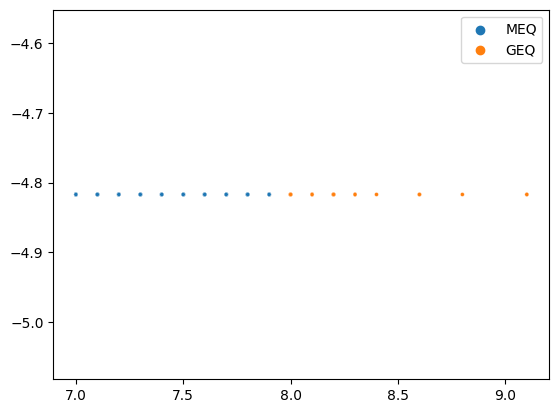

In [86]:
sns.scatterplot(x=X_train[:,3],y=X_train[3][0],hue=Y_train,s=8)

In [87]:
x_points=np.linspace(-1,1)

In [88]:
x=X_train[:,3]

In [89]:
y_points=-(w[0][0]/w[0][3])*x[0]

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

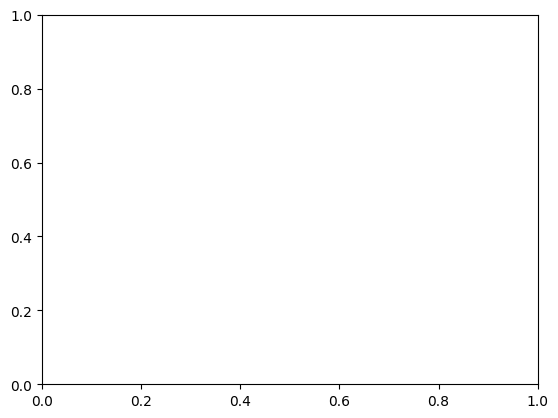

In [90]:
plt.plot(x_points,y_points,c='r')